In [2]:
from trt_utils import preproc, vis
from trt_utils import BaseEngine
import numpy as np
import cv2
import time
import os, sys
import argparse
from loguru import logger
import matplotlib.pyplot as plt
class Predictor(BaseEngine):
    def __init__(self, engine_path, logger, print_log):
        super(Predictor, self).__init__(engine_path, logger, print_log)
        self.n_classes = 1  # your model classes


In [3]:
onnx_predictor = Predictor('../end2end_onnx_2.trt', logger=None, print_log=False)
trt_predictor = Predictor('../yolov7-lite-t_end2end.trt', logger=None, print_log=False)

self.imgsz : (640, 640)
self.imgsz : (640, 640)


In [4]:
onnx_predictor.get_fps()

yolo model inference (without preprocess, postprocess)
0.003s (366.385 FPS)


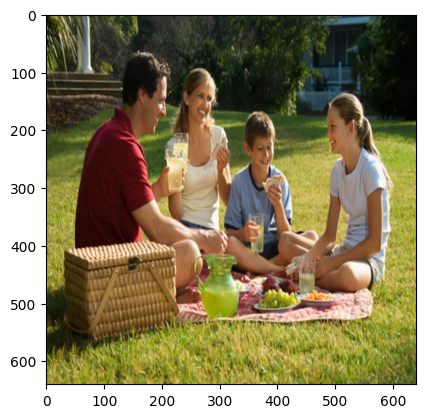

In [5]:
#img = np.random.randn(1,3, 640, 640)
img = cv2.imread('../image.jpg')
img = img[:, :, ::-1]
img = cv2.resize(img, (640, 640))
plt.imshow(img)
img = img / 255.0
img = img.transpose(2, 0, 1)
img = np.ascontiguousarray(img, np.float32)

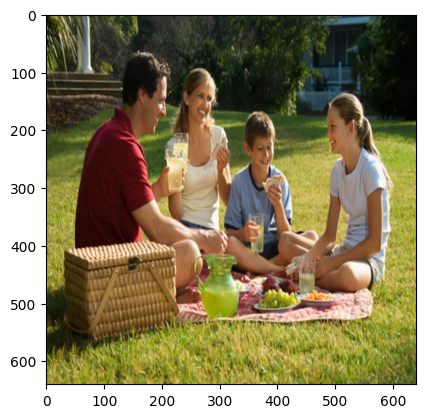

In [6]:
plt.imshow(img.transpose(1,2,0))

In [12]:
yolo_output, nms_result =onnx_predictor.infer(img)

In [16]:
nkpt=5
yolo_output = yolo_output.reshape(-1, 6+nkpt*3)
print(yolo_output.shape)
print(nms_result.shape)
nms_result_idx = np.unique(nms_result)
print(nms_result_idx)

(25200, 21)
(30,)
[    0 24085 24108 24136 24151]


In [30]:
yolo_nms = yolo_output[nms_result_idx]
print((yolo_output[nms_result_idx, 2] * yolo_output[nms_result_idx, 3]))
print(yolo_nms[:, :4])
print(np.argmax((yolo_output[nms_result_idx, 2] * yolo_output[nms_result_idx, 3])))
print(yolo_nms[np.argmax((yolo_output[nms_result_idx, 2] * yolo_output[nms_result_idx, 3]))][0:4])
print(yolo_nms[np.argmax((yolo_output[nms_result_idx, 2] * yolo_output[nms_result_idx, 3]))].shape)

[  36.569275 3575.377   ]
[[  1.6171875   2.1054688   5.6328125   6.4921875]
 [190.25      151.25       42.15625    84.8125   ]]
1
[190.25    151.25     42.15625  84.8125 ]
(21,)


In [31]:
nms_result_idx = nms_result_idx[:2]
yolo_nms = yolo_output[nms_result_idx[1:]]
print(yolo_nms.flatten().shape)

(21,)


In [33]:
yolo_nms.flatten().flatten()

array([190.25      , 151.25      ,  42.15625   ,  84.8125    ,
         0.75683594,   0.9819336 , 198.75      , 144.5       ,
         0.98535156, 202.        , 145.125     ,   0.984375  ,
       205.875     , 161.75      ,   0.984375  , 192.25      ,
       172.125     ,   0.984375  , 195.        , 173.375     ,
         0.97998047], dtype=float32)

In [15]:
for idx in nms_result[2::3]:
    temp = yolo_output[idx][0:4]
    print(idx)
    print(yolo_output[idx][0:4])
    print(temp[0]-temp[2]/2, temp[1]-temp[3]/2 , temp[0]+temp[2]/2, temp[1]+temp[3]/2)

24151
[373.      236.375    40.40625  57.96875]
352.796875 207.390625 393.203125 265.359375
24108
[269.      150.75     45.09375  64.5625 ]
246.453125 118.46875 291.546875 183.03125
24136
[505.5     203.       43.34375  74.1875 ]
483.828125 165.90625 527.171875 240.09375
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625
24085
[190.25    151.25     42.15625  84.8125 ]
169.171875 108.84375 211.328125 193.65625


In [50]:
trt_output[1].reshape(-1,4)

array([[352.75 , 207.5  , 393.25 , 265.25 ],
       [246.5  , 118.5  , 291.5  , 183.   ],
       [483.75 , 165.875, 527.   , 240.125],
       [169.125, 108.875, 211.375, 193.625],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  

-1

In [9]:
onnx_output[0]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)